In [3]:
import pandas as pd

# Criando alunos para a Escola

## Exportando lista JSON

In [4]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [5]:
print("Quantidade de nomes: " +str(len(nomes_f)+(len(nomes_m))))

Quantidade de nomes: 400


In [6]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [7]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [8]:
frames = [nomes_f, nomes_m]

In [9]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [10]:
nomes = pd.concat(frames)['nome'].to_frame()

In [11]:
nomes.sample(5)

,nome
169,WELLINGTON
142,RAISSA
31,RICARDO
73,JANAINA
36,DEBORA


In [12]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [13]:
nomes.shape

(400, 1)

In [14]:
nomes.index = range(nomes.shape[0])

In [15]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
395,WALTER
396,ARLINDO
397,MICHAEL
398,ALVARO


## Incluindo ID dos Alunos

In [16]:
import numpy as np
np.random.seed(123)

In [17]:
total_alunos = len(nomes)
total_alunos

400

In [18]:
nomes['id_alunos'] = np.random.permutation(total_alunos) + 1

In [19]:
nomes.sample(5)

,nome,id_alunos
188,POLIANA,369
57,DAIANE,303
203,FRANCISCO,382
382,CHARLES,33
230,ANDERSON,111


In [20]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios,total_alunos)

In [21]:
nomes.sample(5)

,nome,id_alunos,dominio
284,SEVERINO,78,@dominiodoemail.com.br
200,JOSE,331,@servicodoemail.com
379,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [22]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [23]:
nomes.sample(5)

,nome,id_alunos,dominio,email
314,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela cursos

In [24]:
import html5lib

In [25]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [26]:
type(cursos)

list

In [27]:
cursos = cursos[0]

In [28]:
type(cursos)

pandas.core.frame.DataFrame

In [29]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index dos cursos

In [30]:
cursos = cursos.rename(columns = {'Nome do curso':'nome_do_curso'})

In [31]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [32]:
cursos['id'] = cursos.index + 1 

In [33]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [34]:
cursos = cursos.set_index('id')

In [35]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [37]:
nomes.sample(5)

,nome,id_alunos,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
330,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
270,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
371,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [42]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [43]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
294,JAIR,344,@dominiodoemail.com.br,jair@dominiodoemail.com.br,2
397,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
334,ALBERTO,245,@dominiodoemail.com.br,alberto@dominiodoemail.com.br,3
288,GILMAR,142,@servicodoemail.com,gilmar@servicodoemail.com,2
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br,1


In [44]:
nomes.matriculas.describe()

count    400.000000
mean       2.100000
std        1.464706
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: matriculas, dtype: float64

In [45]:
import seaborn as sns

C:\Users\allys\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

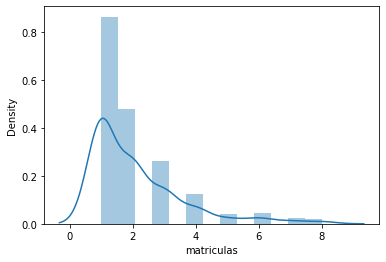

In [48]:
sns.distplot(nomes.matriculas)

In [49]:
nomes.matriculas.value_counts()

1    186
2    103
3     56
4     27
6     10
5      9
7      5
8      4
Name: matriculas, dtype: int64

## Selecionando cursos

In [51]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
267,HENRIQUE,64,@dominiodoemail.com.br,henrique@dominiodoemail.com.br,7
17,LUCIANA,163,@dominiodoemail.com.br,luciana@dominiodoemail.com.br,1
377,CLAUDINEI,254,@servicodoemail.com,claudinei@servicodoemail.com,3
398,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,2
374,DENIS,69,@servicodoemail.com,denis@servicodoemail.com,1


In [52]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [55]:
for index,row in nomes.iterrows():
    id = row.id_alunos
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno','id_curso'])

In [56]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,14
2,43,2
3,304,5
4,304,1


In [58]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,30,Lógica de programação
2,62,Java para Web
3,24,C# para Web
4,7,Ruby on Rails
5,77,Cursos de Python
6,21,PHP com MySql
7,33,.NET para web
8,43,Novas integrações com Java
9,26,TDD com Java


In [59]:
nomes.sample(3)

,nome,id_alunos,dominio,email,matriculas
285,FABRICIO,59,@dominiodoemail.com.br,fabricio@dominiodoemail.com.br,6
12,AMANDA,217,@servicodoemail.com,amanda@servicodoemail.com,1
110,LUCIENE,22,@dominiodoemail.com.br,luciene@dominiodoemail.com.br,1


In [60]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [61]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,14
2,43,2
3,304,5
4,304,1


In [63]:
 matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'}) 

In [64]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,30,Lógica de programação
2,62,Java para Web
3,24,C# para Web
4,7,Ruby on Rails
5,77,Cursos de Python
6,21,PHP com MySql
7,33,.NET para web
8,43,Novas integrações com Java
9,26,TDD com Java


## Saída em diferentes formatos

In [65]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,30,Lógica de programação
2,62,Java para Web
3,24,C# para Web


In [66]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [68]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [69]:
matriculas_json = matriculas_por_curso.to_json()

In [70]:
matriculas_json

'{"quantidade_de_alunos":{"1":30,"2":62,"3":24,"4":7,"5":77,"6":21,"7":33,"8":43,"9":26,"10":20,"11":28,"12":49,"13":17,"14":62,"15":83,"16":24,"17":36,"18":71,"19":70,"20":57},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [71]:
matriculas_html = matriculas_por_curso.to_html()

In [73]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>30</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>62</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>24</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>7</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>77</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>21</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>33</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>43</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>26</td>
 

In [74]:
matriculas_por_curso.to_html('matriculas_por_curso.html')